<a href="https://colab.research.google.com/github/JessicaIsri/Pixel-Classification-of-satellite-images/blob/main/Pixel_Classification_of_satellite_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
import cv2
from matplotlib import cm
import pandas as pd
import seaborn as sns
import geopandas as gpd
from rasterio.plot import show
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [ ]:
path = '/content/drive/MyDrive/ebook geo/Mastering_GeoAI_02/Netherlands_2021.tif'

In [ ]:
src = rasterio.open(path)
im = src.read()

In [ ]:
print(im.shape)

(10, 1571, 3701)


In [ ]:
im = im.transpose([1,2,0])

In [ ]:
R = im[:,:,2]
G = im[:,:,1]
B = im[:,:,0]

In [ ]:
rgb = np.dstack((R,G,B))

(np.float64(-0.5), np.float64(3700.5), np.float64(1570.5), np.float64(-0.5))

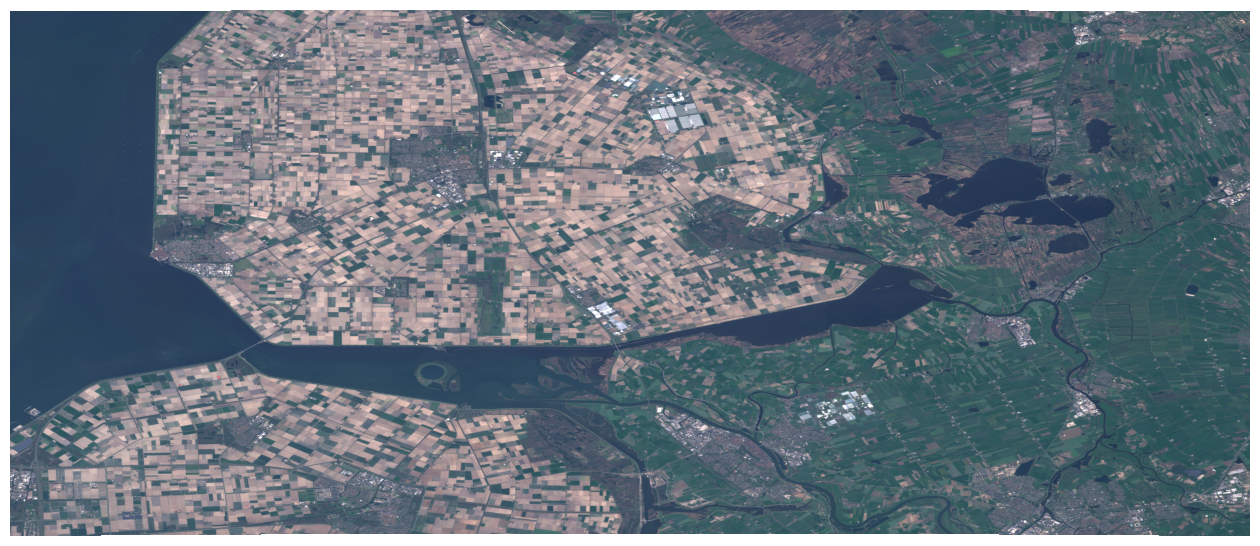

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(rgb*4)
plt.axis('off')

In [ ]:
samples = gpd.read_file('/content/drive/MyDrive/ebook geo/Mastering_GeoAI_02/Samples.shp')

In [ ]:
samples['label'] = samples['id'].replace({1:'Agua', 2:'Urbano', 3:'Floresta', 4:'Agricola_Vegetaçao', 5:'Agricola_Solo'})

In [ ]:
samples

id                  geometry          label
0     1  POINT (5.53812 52.73801)           Agua
1     1  POINT (5.54938 52.69688)           Agua
2     1  POINT (5.58365 52.63372)           Agua
3     1  POINT (5.56897 52.73556)           Agua
4     1  POINT (5.56101 52.63513)           Agua
..   ..                       ...            ...
145   5  POINT (5.95186 52.76716)  Agricola_Solo
146   5  POINT (5.91306 52.77823)  Agricola_Solo
147   5  POINT (5.66679 52.55724)  Agricola_Solo
148   5  POINT (5.67285 52.56134)  Agricola_Solo
149   5  POINT (5.72456 52.55253)  Agricola_Solo

[150 rows x 3 columns]

<Axes: >

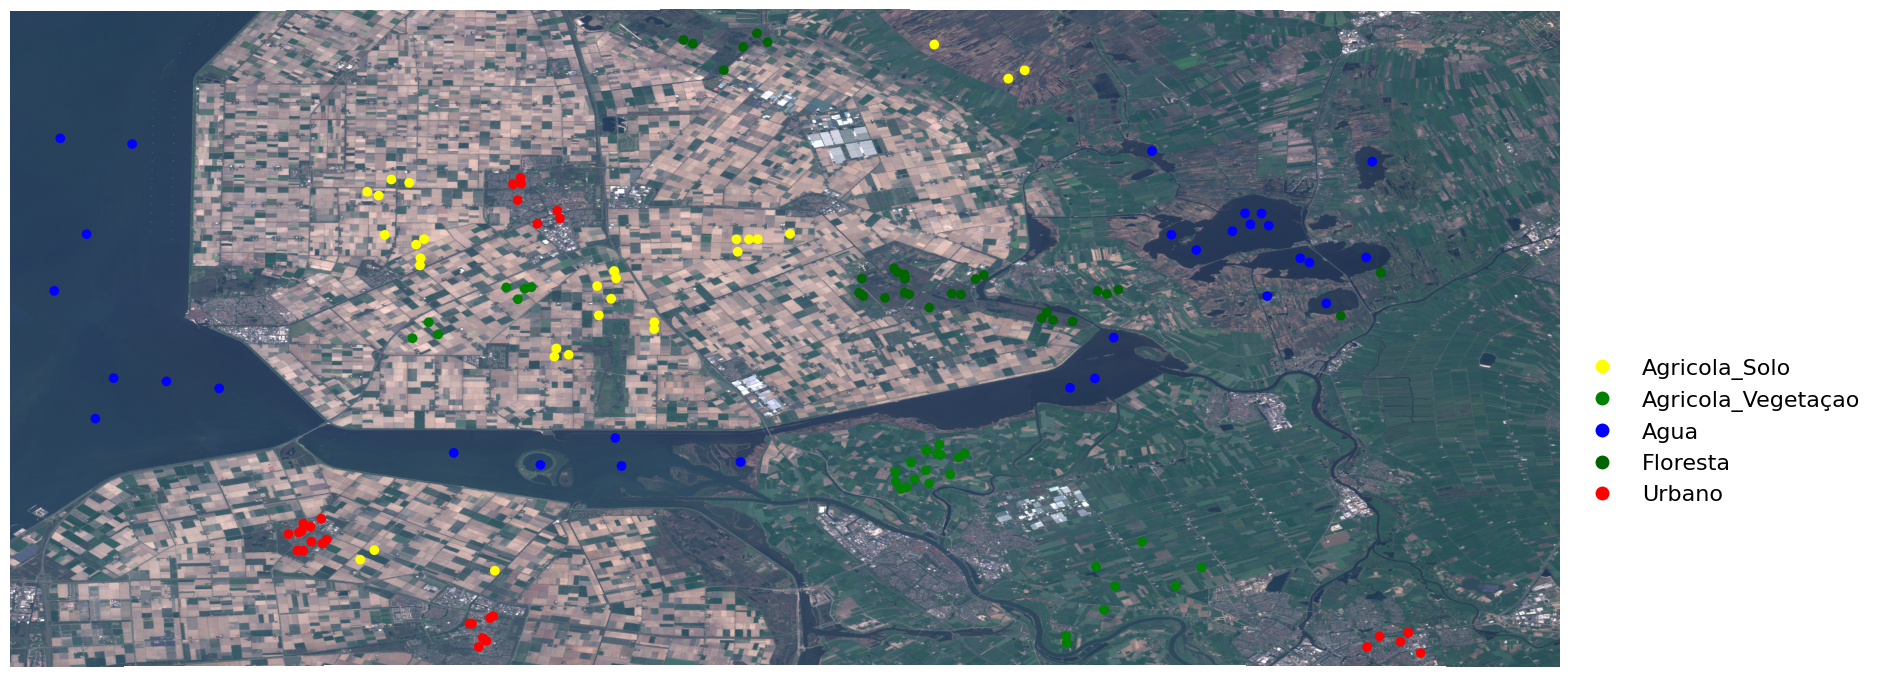

In [ ]:
cmap = ListedColormap(['yellow','green','blue','darkgreen','red'])
fig, ax = plt.subplots(figsize=(20,20))
samples.plot(column='label', categorical=True, cmap=cmap, legend=True, legend_kwds={'bbox_to_anchor':(1, 0.5),'loc':'upper left','fontsize':16,'frameon':False}, ax=ax)
ax.axis('off')
show(rgb.transpose([2,0,1])*4, transform=src.transform, ax=ax)

In [ ]:
array_samples = []
for point in samples['geometry']:
  x = point.xy[0][0]
  y = point.xy[1][0]
  row, col = src.index(x,y)
  band_value = []
  for i in range(src.count):
    band_value.append(src.read(i+1)[row,col])
  array_samples.append(band_value)

In [ ]:
X = np.array(array_samples)
X.shape

(150, 10)

In [ ]:
dataset = pd.DataFrame(data=X, columns=['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12'])
dataset['label'] = samples['id']
dataset

B2       B3       B4       B5       B6       B7       B8      B8A  \
0    0.08895  0.06430  0.03805  0.03390  0.02710  0.02410  0.02085  0.01915   
1    0.09045  0.06295  0.04010  0.03370  0.02945  0.02600  0.02240  0.01970   
2    0.08905  0.06225  0.04045  0.03430  0.02940  0.02630  0.02235  0.02055   
3    0.09050  0.06525  0.04105  0.03480  0.02830  0.02680  0.02175  0.02000   
4    0.09040  0.06080  0.03865  0.03320  0.02830  0.02590  0.02095  0.01920   
..       ...      ...      ...      ...      ...      ...      ...      ...   
145  0.13585  0.12690  0.15220  0.16930  0.24035  0.27875  0.29300  0.32295   
146  0.11155  0.09240  0.09975  0.12525  0.19760  0.23015  0.19315  0.26100   
147  0.16380  0.16275  0.18500  0.19815  0.21450  0.23335  0.21905  0.24180   
148  0.14335  0.13130  0.12980  0.15135  0.25745  0.29175  0.28280  0.30685   
149  0.14075  0.13310  0.14955  0.16235  0.18070  0.19295  0.19540  0.20715   

         B11      B12  label  
0    0.00510  0.00345      1  
1    0.00445  0.00350      1  
2    0.00535  0.00375      1  
3    0.00615  0.00425      1  
4    0.00530  0.00385      1  
..       ...      ...    ...  
145  0.26210  0.16145      5  
146  0.13890  0.08525      5  
147  0.24210  0.22695      5  
148  0.17595  0.13955      5  
149  0.21625  0.19620      5  

[150 rows x 11 columns]

In [ ]:
X = dataset.iloc[:,0:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
new_Y = Y[:,np.newaxis]

In [ ]:
new_Y.shape

(150, 1)

In [ ]:
enc = OneHotEncoder()

enc.fit(new_Y)

onehotlabels = enc.transform(new_Y).toarray()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, onehotlabels, test_size = 0.7, random_state = 42)

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(32,64,16), max_iter=5000,activation = 'relu',solver='adam',random_state=1,verbose=10)

In [ ]:
classifier.fit(X_train, Y_train)

Iteration 1, loss = 3.56857863
Iteration 2, loss = 3.55515021
Iteration 3, loss = 3.54190346
Iteration 4, loss = 3.52804742
Iteration 5, loss = 3.51495315
Iteration 6, loss = 3.50224665
Iteration 7, loss = 3.48984084
Iteration 8, loss = 3.47763488
Iteration 9, loss = 3.46564143
Iteration 10, loss = 3.45378238
Iteration 11, loss = 3.44214885
Iteration 12, loss = 3.43043775
Iteration 13, loss = 3.41862779
Iteration 14, loss = 3.40660758
Iteration 15, loss = 3.39434269
Iteration 16, loss = 3.38184817
Iteration 17, loss = 3.36920150
Iteration 18, loss = 3.35618090
Iteration 19, loss = 3.34293800
Iteration 20, loss = 3.32938103
Iteration 21, loss = 3.31547425
Iteration 22, loss = 3.30125417
Iteration 23, loss = 3.28687562
Iteration 24, loss = 3.27235367
Iteration 25, loss = 3.25759130
Iteration 26, loss = 3.24118685
Iteration 27, loss = 3.22462130
Iteration 28, loss = 3.20788467
Iteration 29, loss = 3.19069097
Iteration 30, loss = 3.17311103
Iteration 31, loss = 3.15514557
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 64, 16), max_iter=5000, random_state=1,
              verbose=10)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(Y_test, y_pred)

0.8952380952380953

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.87      0.65      0.74        20
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        18
           4       0.74      0.85      0.79        20

   micro avg       0.91      0.90      0.91       105
   macro avg       0.91      0.90      0.90       105
weighted avg       0.92      0.90      0.91       105
 samples avg       0.90      0.90      0.90       105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Predicting

In [ ]:
with rasterio.open(path) as src:
    im = src.read()

out_meta = src.meta.copy()
im = im.transpose([1,2,0])

X = np.nan_to_num(im)
flatten_X = X.reshape(X.shape[0]*X.shape[1],X.shape[2])

pred = classifier.predict(flatten_X)

(np.float64(-0.5), np.float64(3700.5), np.float64(1570.5), np.float64(-0.5))

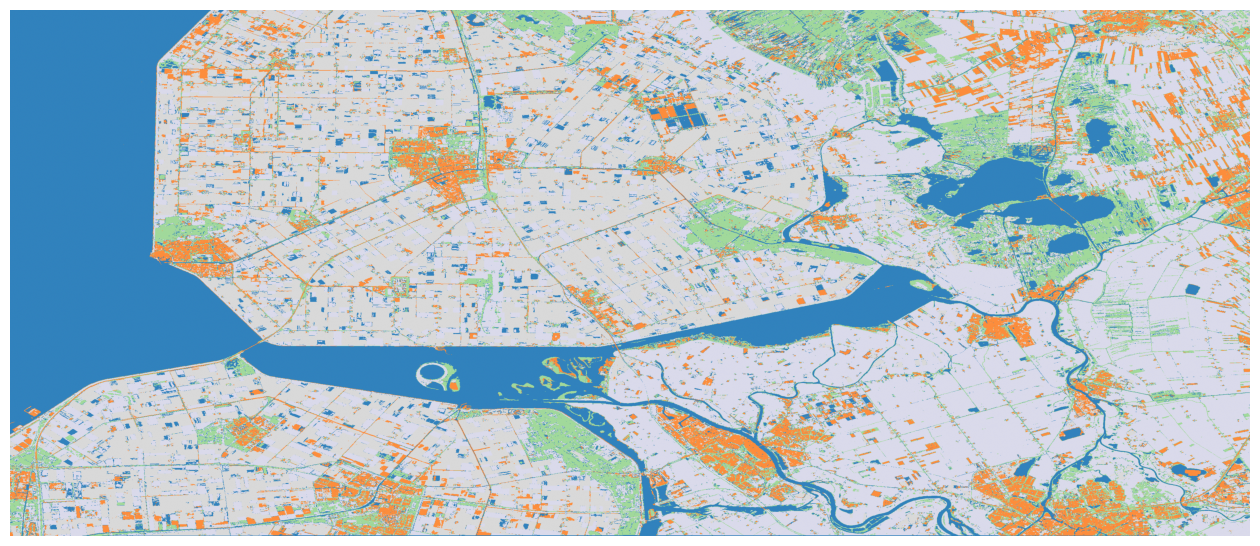

In [ ]:
classify = np.argmax(pred, axis=1)
classify = classify + 1

classify = classify.reshape(X.shape[0],X.shape[1])

plt.figure(figsize=[16,10])
plt.imshow(classify,cmap='tab20c')
plt.axis('off')